<a href="https://www.kaggle.com/code/rajeshkumarkarra/data-inspection?scriptVersionId=243467336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Workflow:
1. Problem statement
2. Data collectio (DB, Server, Cloud, csv, xlsx, webscrapping)
3. Data Inspection
4. Data Cleaning
5. Exploratory Data Analysis
6. Feature Engineering(Encoding)
7. Train-Test split
8. Model Training
9. Dodel Evaluation
10. Hyperparameter Tuning
11. Deployment

Local Machine -----Docker (CI/CD Pipeline with Git ----Cloud

* Local machine - write our codes
* cloud - where we deploy our codes to run 24/7
* Pipeline - to flow /pathway
* GIT - Changes will be reflected automatically
* Docker - Transportation of our codes

### Collective Inspection
### Individual Inspection
### Visual Inspection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraudtest/fraudTest.csv


In [2]:
# 🧹 This line removes JupyterLab (a tool that helps run notebooks),
# because we don't need it here and it can sometimes cause errors.
!pip uninstall -qy jupyterlab

# 🚀 This line installs the Google Generative AI Python library (google-genai)
# The version we're installing is 1.7.0 — it's like downloading the latest brain
# that helps our code talk to Google's smart Gemini robot!
!pip install -U -q "google-genai==1.7.0"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 4.2 MB/s eta 0:00:00


In [3]:
# We are using special tools from Google to talk to the Gemini AI
from google import genai

# We are importing extra tools (called "types") to help talk to Gemini in a smart way
from google.genai import types

# These tools help us show pretty text and output (like bold, colors, or math) in Jupyter Notebooks
from IPython.display import HTML, Markdown, display


In [4]:
# We import something called `retry` from Google's API tools.
# It helps us automatically try again if something goes wrong (like the internet is slow).
from google.api_core import retry

# This line says: "If there's an error, check if it's an API error AND the code is 429 or 503"
# - 429 means: "Too many requests, slow down!"
# - 503 means: "Server is too busy or not ready!"
# So we want to retry only if it's one of these errors.
is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

# Now we take Gemini’s generate_content function and wrap it with a retry feature.
# That means: if Gemini is too busy (429/503), it will try again automatically instead of giving up.
genai.models.Models.generate_content = retry.Retry(
    predicate=is_retriable  # This tells it which errors to retry
)(genai.models.Models.generate_content)  # This is the actual function we're retrying


In [5]:
# This line imports a special helper from Kaggle that lets us get secret info (like passwords or keys)
from kaggle_secrets import UserSecretsClient

# This line gets our super-secret Google API key from Kaggle's safe storage.
# It's like opening a locked treasure chest and grabbing the special key we need to talk to Gemini!
GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")


In [6]:
# First, we make a connection to the smart Gemini robot by using our secret API key.
# This is like saying "Hi Gemini! Here's my key, can I ask you something?"
client = genai.Client(api_key = GOOGLE_API_KEY)

# Now we ask Gemini a question using the model "gemini-2.0-flash".
# We give it some text (our question) and ask it to explain black holes in a simple way.
response = client.models.generate_content(
    model = "gemini-2.0-flash",  # This is the brain we're using (a fast version!)
    contents = "Explain about the Black holes to me like I'm a kid in a single line"  # Our question
)

# We print the answer that Gemini gives us.
# This will show up in our screen like a fun explanation from a smart robot friend.
print(response.text)


Black holes are like cosmic vacuum cleaners with such strong gravity that not even light can escape them!



In [7]:
Markdown(response.text)

Black holes are like cosmic vacuum cleaners with such strong gravity that not even light can escape them!


In [8]:
display(response.text)

'Black holes are like cosmic vacuum cleaners with such strong gravity that not even light can escape them!\n'

In [9]:
client = genai.Client(api_key=GOOGLE_API_KEY)

response = client.models.generate_content(
    model = "gemini-2.0-flash",
    contents = "Explain about Singularity briefly about 2 lines"
)
print(response.text)

Singularity is a containerization platform designed for high-performance computing (HPC) and enterprise environments. It allows users to package entire software environments into a single portable image, ensuring consistent execution across different systems.



In [10]:
# This line starts a new chat with the Gemini robot.
# We tell it which version to use ('gemini-2.0-flash') and start with an empty history.
chat = client.chats.create(model='gemini-2.0-flash', history=[])

# Now we send a message to the Gemini robot, like saying "Hi!"
# The robot will think and answer back.
response = chat.send_message('Hello!, My name is Rajesh Karra')

# Finally, we print the robot's reply so we can read it.
print(response.text)


Hello Rajesh! It's nice to meet you. How can I help you today?



In [11]:
response = chat.send_message('Can you explain me about how the warmholes created in just about 30 words')

print(response.text)

Wormholes, theoretical tunnels through spacetime, might form from extreme gravitational warping. They could connect distant points, potentially allowing faster-than-light travel, but their existence remains unproven and stability is questionable.



In [12]:
response = chat.send_message('Do you remember what my name is')

print(response.text)

Yes, your name is Rajesh Karra.



In [13]:
client = genai.Client(api_key = GOOGLE_API_KEY)

response = client.models.generate_content(
    model = "gemini-2.0-flash",
    contents = "Causes of smell from the mouth, whether it is because of Vitamin defeciency or food"
)

print(response.text)
#Markdown(response.text)

Okay, let's break down the causes of bad breath (halitosis), addressing both dietary and potential vitamin deficiency aspects.

**Common Causes of Bad Breath (Halitosis):**

*   **Poor Oral Hygiene:**
    *   **Plaque and Bacteria:**  The most common culprit. When you don't brush and floss regularly, bacteria accumulate on your teeth, gums, and tongue. These bacteria break down food particles and dead cells, releasing foul-smelling volatile sulfur compounds (VSCs) like hydrogen sulfide (rotten egg smell), methyl mercaptan (cabbage smell), and dimethyl sulfide.
    *   **Food Trapped in Teeth:**  Food particles lodged between teeth or in hard-to-reach areas also decompose, contributing to odor.
    *   **Dirty Dentures/Appliances:** Dentures, retainers, and other dental appliances can harbor bacteria and food debris if not cleaned properly.

*   **Diet:**
    *   **Certain Foods:**  Strongly flavored foods like garlic, onions, coffee, spices, and some cheeses are notorious for causing b

In [14]:
# This line goes through all the models that the Gemini client knows about
for model in client.models.list():
    # For each model, we print its name so we can see which ones we can use
    print(model.name)


models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview

In [15]:
from pprint import pprint  # This helps print things in a neat and easy-to-read way

# We go through all the AI models available using the Gemini API
for model in client.models.list():
    
    # We check if the model's name is "gemini-2.0-flash" (this is the one we want to use)
    if model.name == 'models/gemini-2.0-flash':
        
        # If we found it, we print out all its details nicely (like how it works, its version, etc.)
        pprint(model.to_json_dict())
        
        # Stop the loop — we found what we were looking for!
        break


{'description': 'Gemini 2.0 Flash',
 'display_name': 'Gemini 2.0 Flash',
 'input_token_limit': 1048576,
 'name': 'models/gemini-2.0-flash',
 'output_token_limit': 8192,
 'supported_actions': ['generateContent',
                       'countTokens',
                       'createCachedContent',
                       'batchGenerateContent'],
 'tuned_model_info': {},
 'version': '2.0'}


In [16]:
# We import something called "types" from Google's genai tools.
# These help us set up rules for how the Gemini model should respond.
from google.genai import types

# We are creating a setting (called config) that says:
# "Give me no more than 200 words (tokens) in the answer."
short_config = types.GenerateContentConfig(max_output_tokens = 200)

# Now we ask Gemini to do something for us!
# We tell it:
# - Which model to use: "gemini-2.0-flash" (this is a fast and smart AI)
# - What settings to follow (short_config)
# - What question or task to answer: "Write a 100 word essay on Einstein's E=MC^2"
response = client.models.generate_content(
    model = "gemini-2.0-flash",
    config = short_config,
    contents = "Write a 100 word essay on the Einstein's E=MC^2"
)

# Finally, we print out what Gemini said (its answer!)
print(response.text)


Einstein's iconic equation, E=mc², revolutionized our understanding of the universe by demonstrating the fundamental equivalence of energy and mass. The equation states that energy (E) is equal to mass (m) multiplied by the speed of light (c) squared. This seemingly simple formula has profound implications. It reveals that a small amount of mass can be converted into a tremendous amount of energy, as seen in nuclear reactions. Conversely, energy can be transformed into mass. E=mc² is not just a mathematical curiosity; it's a cornerstone of modern physics, underpinning nuclear power, particle physics, and our understanding of the cosmos.



In [17]:
response = chat.send_message('Do you remember my name')

print(response.text)

Yes, I remember your name. It's Rajesh Karra.



In [18]:
# First, we create a "config" that controls how random the AI's answers are.
# A higher temperature like 2.0 makes the answers more creative and surprising!
high_temp_config = types.GenerateContentConfig(temperature=2.0)

# Now we repeat the next part 5 times
for _ in range(5):
    # We ask the Gemini model (the smart robot) to give us a random color name
    # We give it our "high randomness" config so it gives different answers
    response = client.models.generate_content(
        model="gemini-2.0-flash",  # This tells it which version of Gemini to use
        config=high_temp_config,   # This is how random/creative it should be
        contents="Pick a random color...(respond in a single word)"  # This is our question
    )
    
    # If we got an answer from Gemini...
    if response.text:
        # Print the answer and a row of dashes to separate the outputs
        print(response.text, '-' * 25)


Azure
 -------------------------
Azure
 -------------------------
Magenta
 -------------------------
Turquoise
 -------------------------
Turquoise
 -------------------------


In [19]:
response = chat.send_message('Do you rememeber my name')

print(response.text)

Yes, I remember your name. It is Rajesh Karra.



In [20]:
# This line sets up how "creative" or "random" Gemini should be.
# Temperature = 0.0 means: "Be very serious and give the same answer every time"
low_temp_config = types.GenerateContentConfig(temperature = 0.0)

# We are going to ask Gemini the same question 5 times
for _ in range(5):
    # We ask Gemini: "Pick a random color... (just one word)"
    # But because the temperature is low, it may not be very random
    response = client.models.generate_content(
        model = "gemini-2.0-flash",       # This is the name of the Gemini model we are using
        config = low_temp_config,         # We tell Gemini to use the serious (low-temp) setting
        contents = 'Pick a random color...(respond in a single word)'  # This is the question we ask
    )

    # If Gemini gave us an answer, we print it
    if response.text:
        print(response.text, '-' * 25)    # We also print some dashes to separate each answer


Azure
 -------------------------
Azure
 -------------------------
Azure
 -------------------------
Azure
 -------------------------
Azure
 -------------------------


In [21]:
# First, we are setting how the model should behave using settings
# temperature = how creative Gemini should be (higher = more random and fun!)
# top_p = helps pick the best words (like choosing from a smart list)
model_config = types.GenerateContentConfig(
    temperature = 1.0,   # Full creativity
    top_p = 0.95         # Pick from the top 95% of best next words
)

# Now we give Gemini a fun task!
# We're pretending it's a creative writer and asking it to write a story
story_prompt = "you are a creative writer. Write a short story about a cat who goes on an adventure"

# This is where we ask Gemini to do the job
# We send our prompt and settings to Gemini, and it gives us a story
response = client.models.generate_content(
    model = "gemini-2.0-flash",   # We're using the fast Gemini model
    config = model_config,        # Use the creative settings we picked
    contents = story_prompt       # This is our prompt (what we want Gemini to write)
)

# Finally, we print out the story Gemini created!
print(response.text)


Jasper, a ginger tabby with a perpetually bewildered expression, considered himself a creature of habit. His days were a predictable ballet of sunbeam basking, meticulous grooming, and the strategic deployment of guilt-inducing meows to secure extra tuna. Adventure, in Jasper’s lexicon, was chasing a particularly audacious dust bunny under the sofa.

Until the pigeon.

It wasn't just any pigeon. This pigeon, perched brazenly on the windowsill, puffed out its chest, cooed mockingly, and then, with a flick of its grey wings, soared skyward. Jasper, glued to the glass, felt something unfamiliar stir within him. It wasn't hunger. It wasn't boredom. It was... yearning. Yearning for the unknown.

He knew he couldn't stay. Not after that.

That night, while his human, Emily, was engrossed in a book, Jasper meticulously planned his escape. He’d observed the mechanism of the cat flap countless times. He just needed to… reach. Stretching like a furry elastic band, he hooked a claw onto the latch

In [22]:
# 🧠 This block sets how the Gemini model should behave
# Think of it like telling the AI:
# "Be calm (low temperature), give full answers (top_p), and don’t talk too much (limit tokens)"
model_config = types.GenerateContentConfig(
    temperature = 0.1,       # Low temperature = more predictable answers
    top_p = 1,               # Top-p = allow full creativity range (1 = use all words)
    max_output_tokens = 5,   # Only return up to 5 words in the answer
)

# 📝 This is the message (prompt) we send to Gemini
# We’re asking it to guess the emotion of a movie review (Positive, Neutral, or Negative)
zero_shot_prompt = """Classify movie reviews as POSITIVE, NEUTRAL or NEGATIVE.
Review: "Her" is a disturbing study revealing the direction
humanity is headed if AI is allowed to keep evolving,
unchecked. I wish there were more movies like this masterpiece.
Sentiment: """  # 👈 We're asking Gemini to complete this line with one word: POSITIVE, NEUTRAL, or NEGATIVE

# 🤖 Now we send the prompt to Gemini to get an answer
response = client.models.generate_content(
    model = "gemini-2.0-flash",  # Use the fast Gemini model
    config = model_config,       # Tell it how to behave (from above)
    contents = zero_shot_prompt  # Give it the question we want answered
)

# 📢 Show Gemini's answer on the screen
print(response.text)


POSITIVE



In [23]:
# We import a special tool called 'enum' that helps us make a list of choices
import enum

# We make a class (like a labeled box) called Sentiment
# Inside, we list 3 possible feelings (or moods):
# - POSITIVE: means happy or good
# - NEUTRAL: means okay, not good or bad
# - NEGATIVE: means sad or bad
class Sentiment(enum.Enum):
    POSITIVE = 'positive'
    NEUTRAL = 'neutral'
    NEGATIVE = 'negative'

# We ask the Gemini robot to give us a response based on some input (zero_shot_prompt)
# We tell it:
# - Use the "gemini-2.0-flash" model
# - Expect the answer to be one of the moods (Sentiment)
# - Send the question we want to ask (zero_shot_prompt)
response = client.models.generate_content(
    model = "gemini-2.0-flash",
    config = types.GenerateContentConfig(
        response_mime_type = "text/x.enum",  # This says: "Send the answer in one of our enum moods"
        response_schema = Sentiment  # This tells Gemini to use our Sentiment choices
    ), 
    contents = zero_shot_prompt  # This is the actual thing we ask Gemini to think about
)

# Print the answer Gemini gives us!
print(response.text)


positive


In [24]:
enum_response = response.parsed
print(enum_response)
print(type(enum_response))

Sentiment.POSITIVE
<enum 'Sentiment'>


In [25]:
help(response.parsed)

Help on Sentiment in module __main__ object:

class Sentiment(enum.Enum)
 |  Sentiment(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  An enumeration.
 |  
 |  Method resolution order:
 |      Sentiment
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  NEGATIVE = <Sentiment.NEGATIVE: 'negative'>
 |  
 |  NEUTRAL = <Sentiment.NEUTRAL: 'neutral'>
 |  
 |  POSITIVE = <Sentiment.POSITIVE: 'positive'>
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from enum.Enum:
 |  
 |  name
 |      The name of the Enum member.
 |  
 |  value
 |      The value of the Enum member.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties inherited from enum.EnumMeta:
 |  
 |  __members__
 |      Returns a mapping of member name->value.
 |      
 |      This mapping lists all enum members, including aliases. Note that t

In [26]:
few_shot_prompt = """Parse a customer's pizza order into valid JSON:

EXAMPLE:
I want a small pizza with cheese, tomato sauce, and pepperoni.
JSON Response:
```
{
"size": "small",
"type": "normal",
"ingredients": ["cheese", "tomato sauce", "pepperoni"]
}
```

EXAMPLE:
Can I get a large pizza with tomato sauce, basil and mozzarella
JSON Response:
```
{
"size": "large",
"type": "normal",
"ingredients": ["tomato sauce", "basil", "mozzarella"]
}
```

ORDER:
"""
# 🗣️ This is what the customer actually says
customer_order = "Give me a large with cheese & pineapple"

# 🤖 We now ask Gemini AI to help us figure out what this order means in code (JSON)
response = client.models.generate_content(
    model = "gemini-2.0-flash",  # 🧠 We're using Gemini Flash, a fast AI model
    config = types.GenerateContentConfig(
        temperature = 0.1,        # 🎯 Low temperature = more accurate/serious answers
        top_p = 1,                # 📊 Controls randomness; 1 = normal
        max_output_tokens = 250, # 📏 Max length of the answer
    ), 
    # 📦 We send both our instructions (examples) and the customer order
    contents = [few_shot_prompt, customer_order]
)

# 🖨️ Finally, we print what Gemini answered!
print(response.text)

```json
{
"size": "large",
"type": "normal",
"ingredients": ["cheese", "pineapple"]
}
```



# Collective and Individual Inspection of a dataset

In [27]:
!pip install kagglehub

In [28]:
!pip install --upgrade kagglehub[pandas-datasets]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.9
    Uninstalling kagglehub-0.3.9:
      Successfully uninstalled kagglehub-0.3.9


In [29]:
!pip install dask

In [30]:
import kagglehub

kagglehub.login()

In [31]:
# Reinstall just to be sure
!pip install --upgrade kagglehub[pandas-datasets]
!pip install kagglehub[hf-datasets]
!pip install kagglehub[polars-datasets]


import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset using the PANDAS adapter
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rajeshkumarkarra/fraudTest",
    "fraudTest.csv"
)

# Preview
df.head()


<ipython-input-31-f6daee75c77d>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

## Collective Inspection

In [33]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [34]:
df.shape

(555719, 23)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [36]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [37]:
df.duplicated().sum()

0

In [38]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [39]:
df.memory_usage().sum()

102252424

In [40]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [41]:
df.describe(include=object)

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719,555719
unique,226976,693,14,341,471,2,924,849,50,478,910,555719
top,15-12-2020 21:26,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,23-03-1977,2da90c7d74bd46a0caf3777415b3ebd3
freq,16,1859,56370,11443,12146,304886,1474,2423,40393,4119,2408,1


In [42]:
num_df = df.select_dtypes(include='number')
num_df

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2.291160e+15,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,1,3.573030e+15,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2,3.598220e+15,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3,3.591920e+15,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,4,3.526830e+15,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,3.056060e+13,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,555715,3.556610e+15,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,555716,6.011720e+15,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,555717,4.079770e+12,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [43]:
num_df.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000823,-0.001137,0.001479,0.000336,-0.001558,-0.000794,0.997054,0.000394,-0.001586,-0.013892
cc_num,-0.000823,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,-0.001137,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.001479,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,0.000336,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.001558,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.000794,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,0.997054,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,0.000394,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.001586,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060


<Figure size 2000x2000 with 0 Axes>

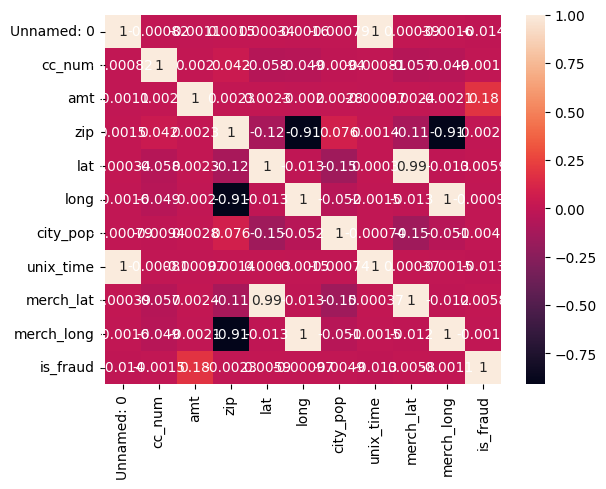

<Figure size 2000x2000 with 0 Axes>

In [44]:
sns.heatmap(num_df.corr(), annot=True)
plt.figure(figsize=(20, 20))

# Individual Inspection

In [45]:
cat_df = df.select_dtypes(include='object')
cat_df

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,21-06-2020 12:14,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3
1,21-06-2020 12:14,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7
2,21-06-2020 12:14,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be
3,21-06-2020 12:15,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c
4,21-06-2020 12:15,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31-12-2020 23:59,fraud_Reilly and Sons,health_fitness,Michael,Olson,M,558 Michael Estates,Luray,MO,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada
555715,31-12-2020 23:59,fraud_Hoppe-Parisian,kids_pets,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91
555716,31-12-2020 23:59,fraud_Rau-Robel,kids_pets,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408
555717,31-12-2020 23:59,fraud_Breitenberg LLC,travel,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa


In [46]:
cat_df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [47]:
cat_df.nunique()

trans_date_trans_time    226976
merchant                    693
category                     14
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
job                         478
dob                         910
trans_num                555719
dtype: int64

In [48]:
cat_df['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [49]:
cat_df['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [50]:
cat_distribution = cat_df['category'].value_counts(normalize=True)
cat_distribution

category
gas_transport     0.101436
grocery_pos       0.094568
home              0.094193
shopping_pos      0.089597
kids_pets         0.087620
shopping_net      0.075180
entertainment     0.072166
personal_care     0.070768
food_dining       0.070662
health_fitness    0.065994
misc_pos          0.062215
misc_net          0.049246
grocery_net       0.034957
travel            0.031399
Name: proportion, dtype: float64

In [51]:
avg_amt_df_by_cat = df.groupby('category')['amt'].mean().sort_values(ascending=False)
avg_amt_df_by_cat

category
grocery_pos       115.885327
travel            112.389683
shopping_net       83.481653
misc_net           78.600237
shopping_pos       76.862457
entertainment      63.984840
gas_transport      63.577001
misc_pos           62.182246
home               57.995413
kids_pets          57.506913
health_fitness     53.867432
grocery_net        53.731667
food_dining        50.777938
personal_care      48.233021
Name: amt, dtype: float64